# Time Series Forecasting by Using Machine Learning 

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import requests as req

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('tableau-colorblind10')

## 1. Data import 

### 1.1 API request

In [2]:
def data_request_API(dataset_name, start_date, end_date, sort = 'HourDK asc', set_time_index = True):

    """API Dataset request to Energidataservice

    Arg:
        dataset_name(str): Name of dataset to import.

        start_date (str): Start data of time index. 
        Ex: '2020-01-01'

        end_date (str): End date of time index. 
        Ex: '2023-01-01'

        sort (str, optional): Sorting method. Defaults to 'HourDK asc'.

        set_time_index (bool, optional): Set automativally the time index as datetime format. Defaults to True.

    Returns:
        df: Requested dataframe

    Examples:
        df = data_request_API('elspotprices', '2020-01-01', '2023-12-01')

    """
    
    #Create query for the API request
    query = {'start': start_date,
             'end': end_date,
             'sort': sort}
    
    # Create URL for the dataset location
    requestURL = 'http://api.energidataservice.dk/dataset/' + dataset_name 

    # Request the json object
    response_json = req.get(requestURL, 
                            params = query
                            ).json()
    
    # Convert json to pandas dataframe
    df = pd.json_normalize(response_json     ['records'])

    if set_time_index == True:
        # Convert index to datetime format
        df['HourDK'] = pd.to_datetime(df['HourDK'])

        # Set datetime index
        df.set_index(['HourDK'], inplace= True)

    return df

In [5]:
raw_data_wind_production = data_request_API('ProductionConsumptionSettlement', '2021-01-01', '2022-01-01')

In [6]:
raw_data_wind_production.head()

,HourUTC,PriceArea,CentralPowerMWh,LocalPowerMWh,CommercialPowerMWh,LocalPowerSelfConMWh,OffshoreWindLt100MW_MWh,OffshoreWindGe100MW_MWh,OnshoreWindLt50kW_MWh,OnshoreWindGe50kW_MWh,...,ExchangeNO_MWh,ExchangeSE_MWh,ExchangeGE_MWh,ExchangeNL_MWh,ExchangeGreatBelt_MWh,GrossConsumptionMWh,GridLossTransmissionMWh,GridLossInterconnectorsMWh,GridLossDistributionMWh,PowerToHeatMWh
HourDK,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,2020-12-31T23:00:00,DK1,833.113098,355.380249,105.565590,3.188102,20.014393,86.133430,0.898527,60.625435,...,1627.594482,618.416016,-2033.574951,0.0,366.799988,2046.457275,65.661835,64.461502,87.940987,6.923799
2021-01-01 00:00:00,2020-12-31T23:00:00,DK2,553.796265,77.695747,255.620667,12.903380,3.898500,205.625137,0.236435,188.253418,...,NaN,1163.549683,-643.640015,NaN,-372.399994,1445.568481,34.284847,12.940000,62.451050,19.424271
2021-01-01 01:00:00,2021-01-01T00:00:00,DK1,854.658386,307.007904,107.620941,2.740359,16.995346,69.114326,0.412109,47.665421,...,1627.506348,618.517029,-2171.616943,0.0,511.700012,1994.624146,71.607117,64.268700,86.738953,4.107254
2021-01-01 01:00:00,2021-01-01T00:00:00,DK2,547.280640,76.949402,262.375275,12.197636,4.695000,170.806061,0.226032,168.237671,...,NaN,1162.635010,-481.165009,NaN,-519.500000,1404.763916,31.960836,9.070000,60.140400,19.984171
2021-01-01 02:00:00,2021-01-01T01:00:00,DK1,688.116699,303.985352,108.348549,2.540362,10.837593,69.152557,0.095036,29.489496,...,1627.307373,618.508972,-1830.067993,0.0,291.299988,1921.895142,60.446247,64.110603,84.124916,4.221787


In [7]:
raw_data_wind_production.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2021-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HourUTC                     17520 non-null  object 
 1   PriceArea                   17520 non-null  object 
 2   CentralPowerMWh             17520 non-null  float64
 3   LocalPowerMWh               17520 non-null  float64
 4   CommercialPowerMWh          17520 non-null  float64
 5   LocalPowerSelfConMWh        17520 non-null  float64
 6   OffshoreWindLt100MW_MWh     17520 non-null  float64
 7   OffshoreWindGe100MW_MWh     17520 non-null  float64
 8   OnshoreWindLt50kW_MWh       17520 non-null  float64
 9   OnshoreWindGe50kW_MWh       17520 non-null  float64
 10  HydroPowerMWh               17520 non-null  float64
 11  SolarPowerLt10kW_MWh        17520 non-null  float64
 12  SolarPowerGe10Lt40kW_MWh    17520 non-null  float64
 

## 1.2 Data Cleaning

In [29]:
# Select columns regarding wind power production
df = raw_data_wind_production[['PriceArea','OffshoreWindLt100MW_MWh','OffshoreWindGe100MW_MWh', 'OnshoreWindLt50kW_MWh', 'OnshoreWindGe50kW_MWh']].copy()

# Aggregate data by the same time_index
df = df.groupby('HourDK').sum()

# Sum the columns for getting total wind power production (MW)
df['wind_power_production_MW'] = df.sum(axis= 1)

# Select only total wind production
df = pd.DataFrame(df.wind_power_production_MW.copy())

<AxesSubplot:title={'center':'Wind Power Production in Denmark'}, xlabel='HourDK'>

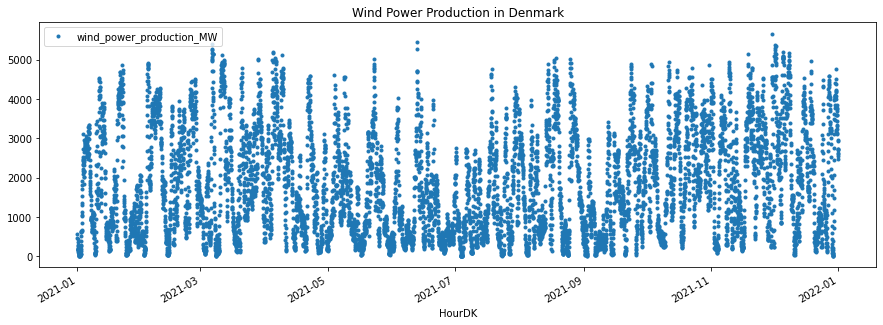

In [34]:
df.plot(style='.',
        figsize=(15,5),
        color=color_pal[0],
        title='Wind Power Production in Denmark')

## 2. Train / Test Split

### 2.1 Time Series Cross Validation

In [37]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=24*60*1, gap = 24)

df = df.sort_index()

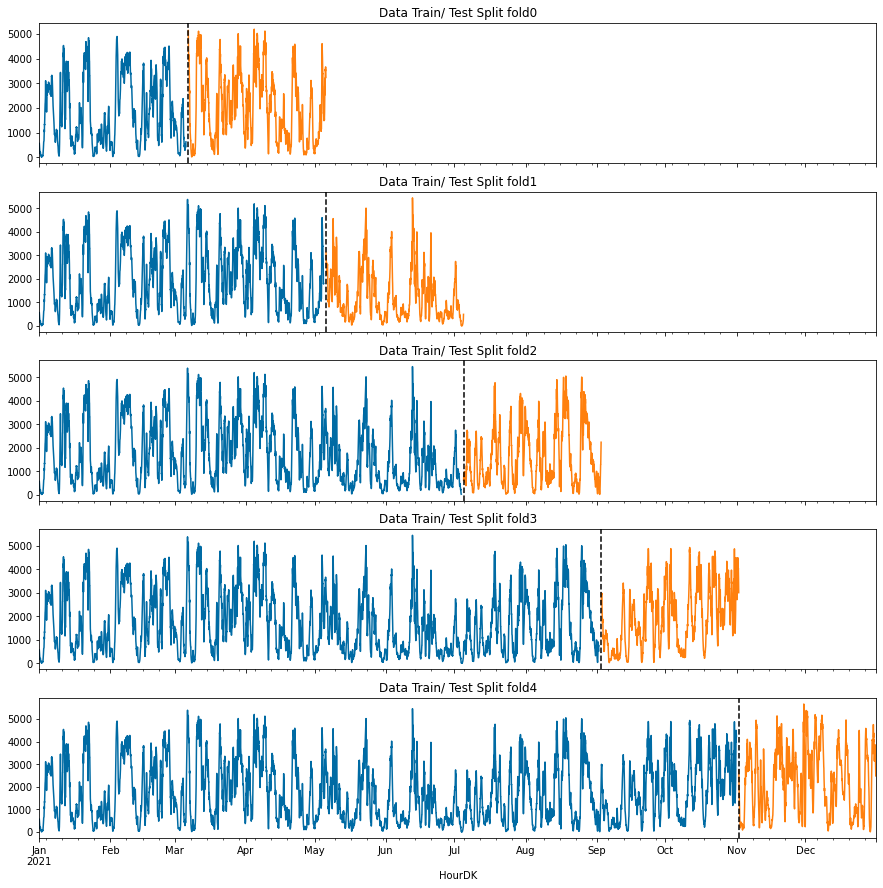

In [38]:
fig, axs = plt.subplots(5, 1, figsize = (15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['wind_power_production_MW'].plot(ax=axs[fold],
                                           label='Training Set',
                                           title=f'Data Train/ Test Split fold{fold}')
    test['wind_power_production_MW'].plot(ax=axs[fold],
                                          label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold +=1
plt.show()